In [2]:
import numpy as np
import pandas as pd
import nltk
from collections import Counter 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from zipfile import ZipFile 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, chi2
import pickle

In [3]:
corpus = pd.read_csv("C:/Users/User/Downloads/TA/traindata.csv")
corpus.head()

,review,label
0,starter gituu,0
1,motor matic xeon karbu kemarin mati starter ak...,0
2,saring filter karbu tenaga saring tenaga gas s...,1
3,honda matic vario esp habis oli mesin karna tu...,1
4,mesin,1


In [4]:
corpus_test = pd.read_csv("C:/Users/User/Downloads/TA/testdata.csv")
corpus_test.head()

,review,label
0,motor mio sporty setang getar,0
1,maaf mesin motor honda beat fi,1
2,kabel spul mio soul api warna om,0
3,motor karisma lampu papan monitor tanda sen la...,0
4,speedo meter mati indikator bensin ganti,0


In [5]:
corpus_all = pd.concat([corpus, corpus_test], axis=0)

In [6]:
corpus_all.shape

(505, 2)

In [7]:
corpus_mesin= corpus_all[corpus_all.label==1]

In [8]:
corpus_nonmesin= corpus_all[corpus_all.label==0]

In [9]:
tmp= corpus_mesin.review.str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(tmp)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(20),
                    columns=['Word', 'Frequency'])
print (rslt)

       Word  Frequency
0     motor        191
1     mesin         89
2       gas         59
3      mati         57
4     bunyi         52
5     ganti         49
6     nyala         43
7     suara         40
8       mio         36
9    kadang         32
10    hidup         29
11    jalan         24
12     gigi         23
13   normal         23
14     beat         22
15      oli         21
16    tarik         19
17      api         18
18    honda         17
19  injeksi         17


Text(0.5, 0, 'Kata')

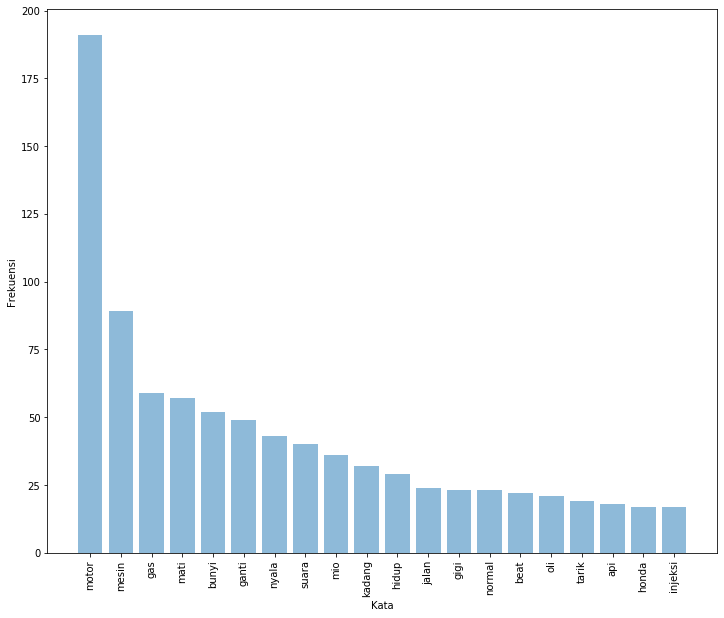

In [10]:
plt.figure(figsize=(12,10))
plt.bar(rslt.Word, rslt.Frequency, align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylabel('Frekuensi')
plt.xlabel('Kata')

In [11]:
tmp= corpus_nonmesin.review.str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(tmp)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(20),
                    columns=['Word', 'Frequency'])
print (rslt)

         Word  Frequency
0       motor        135
1       lampu         38
2         aki         35
3         rem         35
4        mati         32
5         ban         27
6       bagus         21
7       matic         19
8     starter         17
9       ganti         15
10      jalan         15
11      nyala         14
12      pakai         12
13       velg         11
14  indikator         11
15      hidup         11
16     kontak         10
17       jari         10
18     pasang         10
19      stang         10


Text(0.5, 0, 'Kata')

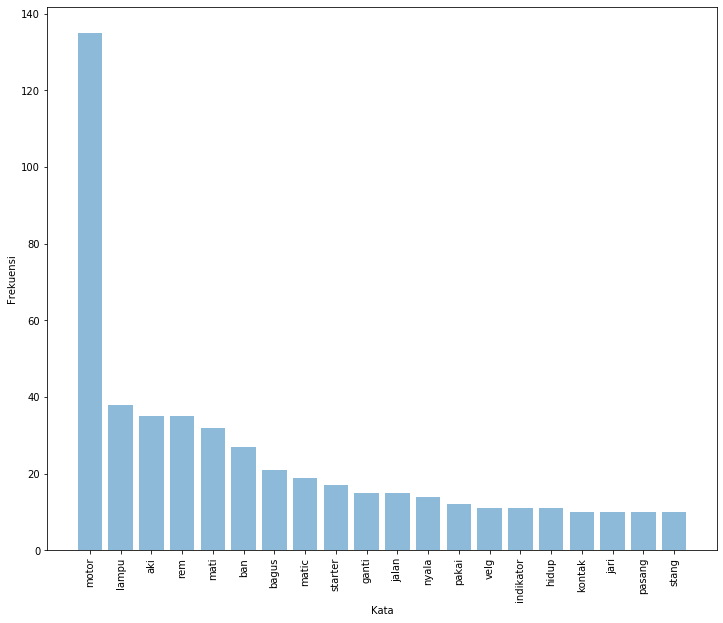

In [12]:
plt.figure(figsize=(12,10))
plt.bar(rslt.Word, rslt.Frequency, align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylabel('Frekuensi')
plt.xlabel('Kata')

In [18]:
vectorizer = CountVectorizer(ngram_range=(1,1)).fit(corpus['review'])
#print (X.vocabulary_)
#print(vectorizer.get_feature_names())
X = vectorizer.transform(corpus['review'])
print (X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
X_test = vectorizer.transform(corpus_test['review'])
print (X_test.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True).fit(X)
X = tfidf_transformer.transform(X)
print (X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
X_test = tfidf_transformer.transform(X_test)
print (X_test.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
# print idf values
##df_idf = pd.DataFrame(tfidf_transformer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
#df_idf.sort_values(by=['idf_weights'])

In [22]:
X_test.shape

(101, 910)

In [23]:
y= corpus['label'].values
print(y)

[0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0
 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0
 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0
 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0]


In [24]:
y_test= corpus_test['label'].values
print(y_test)

[0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0
 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1
 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0]


In [25]:
filename = 'uxy.p'
outfile = open(filename,'wb')
pickle.dump([X,y],outfile)
outfile.close()

In [26]:
filename = 'uxy_test.p'
outfile = open(filename,'wb')
pickle.dump([X_test,y_test],outfile)
outfile.close()

Text(0.5, 0, '$\\chi^2$')

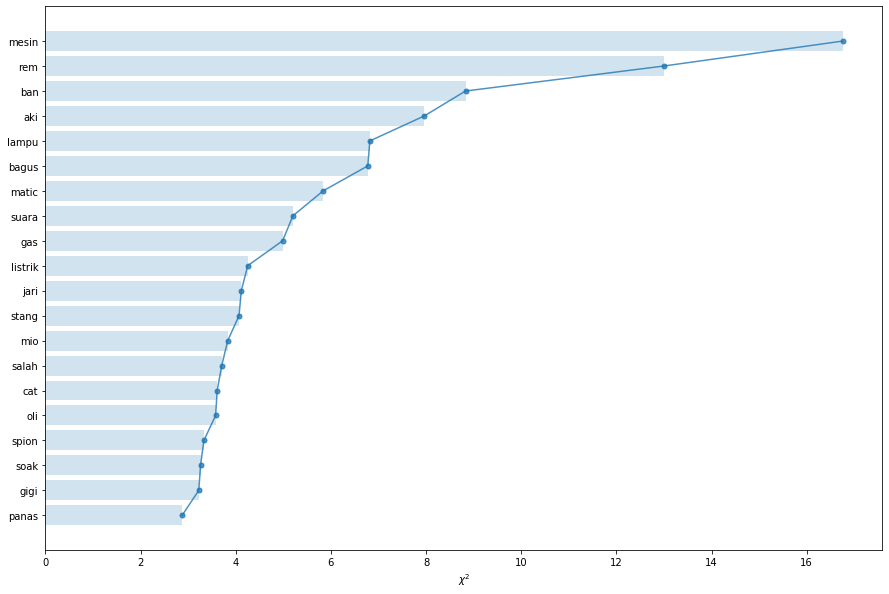

In [34]:
chi2score = chi2(X, y)[0]

plt.figure(figsize=(15,10))
wscores = list (zip(vectorizer.get_feature_names(), chi2score))
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list (zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')